In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel('default of credit card clients.xls', skiprows=1, index_col='ID')
df.rename({'default payment next month': 'default'}, axis=1, inplace=True)

In [36]:
df[:9].T.head(24)

ID,1,2,3,4,5,6,7,8,9
LIMIT_BAL,20000,120000,90000,50000,50000,50000,500000,100000,140000
SEX,2,2,2,2,1,1,1,2,2
EDUCATION,2,2,2,2,2,1,1,2,3
MARRIAGE,1,2,2,1,1,2,2,2,1
AGE,24,26,34,37,57,37,29,23,28
PAY_0,2,-1,0,0,-1,0,0,0,0
PAY_2,2,2,0,0,0,0,0,-1,0
PAY_3,-1,0,0,0,-1,0,0,-1,2
PAY_4,-1,0,0,0,0,0,0,0,0
PAY_5,-2,0,0,0,0,0,0,0,0


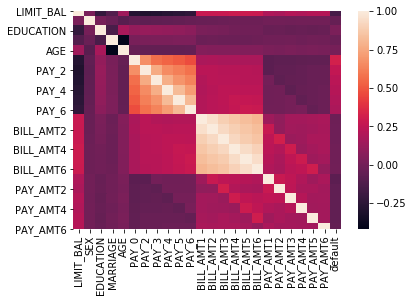

In [4]:
sns.heatmap(df.corr())

In [5]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [7]:
df.shape

(30000, 24)

In [8]:
# Combine other small categories  
df.loc[(df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0), 'EDUCATION'] = 4

In [9]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [10]:
# Combine to have 1:married, 2:single, 3:other
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3

In [11]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [37]:
df.rename({'PAY_0': 'pay_stat_sep', 'PAY_2': 'pay_stat_aug', 'PAY_3': 'pay_stat_jul', 'PAY_4': 'pay_stat_jun', 'PAY_5': 
           'pay_stat_may', 'PAY_6': 'pay_stat_apr'}, axis=1, inplace=True)

In [39]:
for col in df.columns:
    df.rename({'{}'.format(col): '{}'.format(col.lower())}, axis=1, inplace=True)

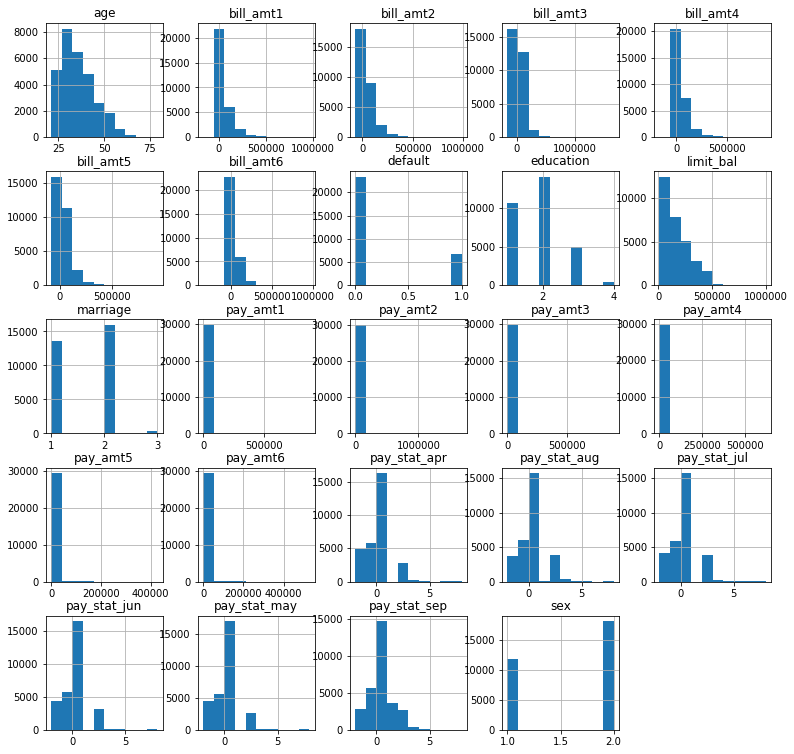

In [40]:
ax = df.hist(figsize=(13,13))

In [12]:
X = df.drop('default', axis=1)
y = df['default']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
model = RandomForestClassifier(n_estimators=100)

In [27]:
param_grid = {'max_depth':range(1,8+1),'min_samples_leaf':[5,10,15]}

opt_model = GridSearchCV(model,param_grid,cv=10,scoring='roc_auc')
opt_model.fit(X_train,y_train)
best_model = opt_model.best_estimator_

opt_model.best_params_

{'max_depth': 8, 'min_samples_leaf': 10}

0.7788087348706138

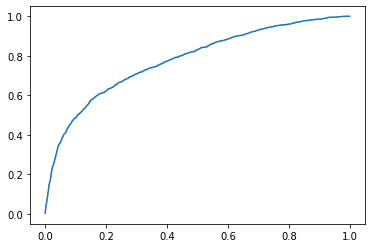

In [30]:
probas= best_model.predict_proba(X_test)
fpr,tpr,thr = roc_curve(y_test,probas[:,1])
sns.lineplot(fpr,tpr)
auc(fpr,tpr)

In [14]:
# pipe = Pipeline([('scl', MinMaxScaler()),
#                  ('pca', PCA(n_components=10)),
#                  ('svm', SVC())])

In [15]:
# grid = [{'svm__kernel': ['poly', 'sigmoid'],
#          'svm__C': [0.01, 1, 100],
#          'svm__degree0': [2,3,4,5],
#          'svm__gamma': [0.001, 0.01]}]

In [16]:
# gridsearch = GridSearchCV(estimator=pipe,
#                   param_grid=grid,
#                   scoring='accuracy',
#                   cv=3)

In [18]:
# test1 = pipe.fit(X_train, y_train)

In [ ]:
# pred1 = test1.predict(X_test)

In [ ]:
# test1.score(X_test, y_test)

In [ ]:
# roc_auc_score(y_test, pred1)